<a href="https://colab.research.google.com/github/ganadaralabs/ComputerVision_Colab/blob/main/7%EA%B0%95_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%95%84%ED%84%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Colab Computer Vision Lecture 06** created by [Jooyeon Lee](http://leejooyeon.com/) | Check out other colab lectures on [GITHUB](https://github.com/ganadaralabs/ComputerVision_Colab)


#실습6_**이미지 필터1**

##01 이미지 필터

**이미지 필터**란 이미지에서 원하는 정보만 통과시키고 원치 않는 정보는 걸러 내거나 변경하는 작업

-  **주파수 영역 필터 (Frequency Domain Filtering)**: 이미지의 픽셀 값의 차이를 주파수로 변환해서 활용

-  **공간 영역 필터 (Spatial Domain Filtering)**: **커널**이라고 불리는 **마스크**를 사용해 이미지의 특정구간을 차례대로 **컨볼루션 연산**하여 활용 







**01.1 커널(kernel)과 필터(Filter)** 
  - 커널(kernel) 혹은 윈도우(window)라고 불리는 마스크를 사용해 이미지 필터링을 수행

  - 주변 픽셀을 어디까지 활용할 것인지 혹은어떻게 결과 값을 산출할 것인지를 정한 행렬

<br>
$$
\mathbf{Kernel}
=
\frac{1}{5}
\times
\begin{bmatrix} 
    1   &1   &1 \\
    1   &1   &1 \\
    1   &1   &1 \\
\end{bmatrix}
$$
<br>

  - 커널의 가로x세로 크기는 3x3, 7x7, 5x7... 등 다양하지만 꼭 홀수로 사용해야 가운데 픽셀을 중심으로 주변 픽셀 연산이 가능함  

      <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_kernel_sizes.jpg" alt="img" height="150"/>

<br>

  - 보통 **커널(kernel)**과 **필터(filter)**를 혼용해 사용하지만 보통 딥러닝에서 **필터**는 커널보다 한 단계 높은 **여러 개의 커널**을 지칭

  ![img](https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)


**01.2 컨볼루션(Convolution, 합성곱) 연산**

커널이 이미지의 모든 픽셀을 하나하나씩 옮겨가며 타겟 픽셀과 그 주변 픽셀 값을 연산하고 새로운 값을 도출하는 연산
<br>      
      ![img](https://miro.medium.com/max/780/1*Eai425FYQQSNOaahTXqtgg.gif)
<br>


- 다양한 크기와 값을 가진 마스크/커널을 적용하면 연산하면 결과가 달라짐
    
  - **블러링 필터(Blurring Filter)**: 결과 픽셀에 주변 요소 값들의 평균값을 반영해 흐릿해짐
    
  - **샤프닝 필터(Sharpening Filter)**: 결과 픽셀에 주변 요소 값들의 차이를 반영해 선명해짐 

<br>



```
cv2.filter2D(image, dtype, kernel)
```
Parameters:
- image: 입력 이미지
- 결과이미지의 dtype
  - -1: 입력 이미지와 동일
  - CV_8U, CV_32F, CV_64F 등등
- kernel: 컨볼루션 커널, float32의 N x M 크기의 배열  



<br><br>

참고링크: 
1. [Types of Convolution Kernels : Simplified](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37)
2. [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
3. [Convolutions with OpenCV and Python](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)
4. [5% salt-and-pepper noise 사진](http://www.fit.vutbr.cz/~vasicek/imagedb/)



##02 블러링 필터(Blurring Filter)

**02.1 평균 블러링 필터**
- 필터링 대상 위치에서 가까이 있는 픽셀과 멀리 있는 픽셀이 모두 같은 가중치를 사용하여 평균을 계산
- 멀리 있는 픽셀의 영향을 많이 받을 수 있음
```
	cv2.blur(image, (M, N))
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
  ![](https://wjrmffldrhrl.github.io/assets/images/digital_9/avg_filter.png)



In [ ]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


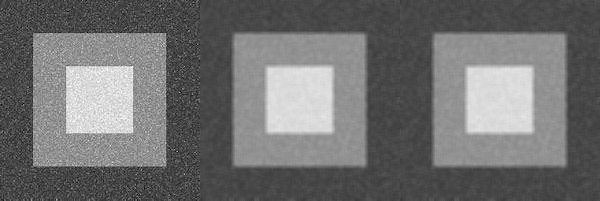

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper200x200.jpg')

#커널 직접 구현
kernel = np.array([[0.04,0.04,0.04,0.04,0.04],
                   [0.04,0.04,0.04,0.04,0.04],
                   [0.04,0.04,0.04,0.04,0.04],
                   [0.04,0.04,0.04,0.04,0.04],
                   [0.04,0.04,0.04,0.04,0.04]])
#커널 간편 구현
#kernel = np.ones((5,5))/25

#openCV 필터2D 함수를 사용
blurred1 = cv2.filter2D(image, -1, kernel)

#openCV 블러링 함수를 사용
blurred2 = cv2.blur(image,(5,5))


blurred_images = np.hstack([image,blurred1,blurred2])
cv2_imshow(blurred_images)

**02.2 가우시안 블러링 필터**
- 가운데 값일 수록 가우시안 가중치를 더한 필터
```
	cv2.GaussianBlur(image, (M, N), σ)
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
      <img src="https://wjrmffldrhrl.github.io/assets/images/digital_9/gaussian_filter.png" alt="img" height="150"/>

  - σ:  x방향 표준편차, 블러링을 어느정도 할지 결정 
    - 0: 시그마 값 자동 설정
    - y방향 시그마 값을 설정하지 않으면 x와 y시그마 값을 동일 설정
    <img src="https://miro.medium.com/max/1400/1*UNia4_xaMhui465JKKHGVg.png" alt="img" height="250"/>



원본, 가우시안필터 직접생성, getGaussianKernel(), cv2.GaussianBlur()


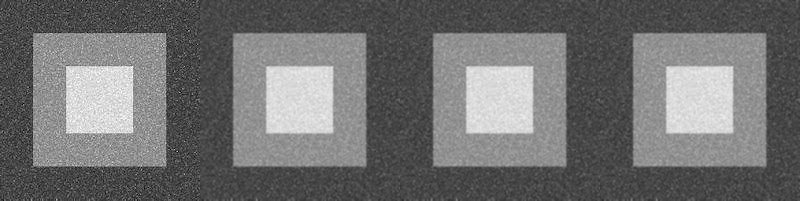

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper200x200.jpg')


#가우시안 커널을 직접 만들기 
kernel1 = np.array([[1,2,1],
                    [2,4,2],
                    [1,2,1]])*(1/16)
blurred1 = cv2.filter2D(image, -1, kernel1)

#OpenCV에서 제공하는 가우시안 함수를 사용해 필터에 적용
#cv2.getGaussianKernel()함수는 1차원 배열이기 때문에 K*K.T 형식으로 사용
kernel2 = cv2.getGaussianKernel(3,0)
blurred2 = cv2.filter2D(image, -1, kernel2*kernel2.T)

#OpenCV에서 제공하는 가우시안 필터 함수 사용
blurred3 = cv2.GaussianBlur(image,(3,3),0)

print("원본, 가우시안필터 직접생성, getGaussianKernel(), cv2.GaussianBlur()")
blurred_images = np.hstack([image,blurred1,blurred2,blurred3])
cv2_imshow(blurred_images)



**02.3 미디언 블러링 필터**
- 커널 영역의 픽셀 값 중 중간 값을 선택
- salt & pepper 노이즈를 해결하는데 좋은 성능을 보임
```
	cv2.medianBlur(image, dimension),
```
  Parameters:
  - image: 입력 이미지
  - (M,N): 컨볼루션 커널float32의 배열 크기 N x M  
  - dimension: 커널크기



original, 3, 5, 7


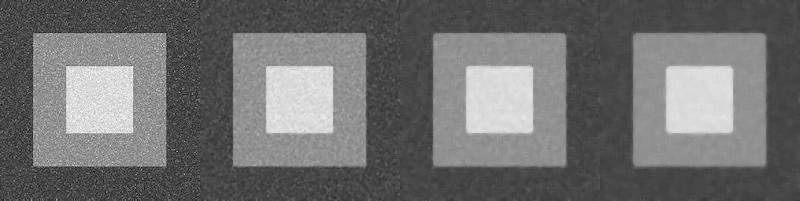

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper200x200.jpg')

medianBlurred = np.hstack([
  image,
	cv2.medianBlur(image, 3),
	cv2.medianBlur(image, 5),
	cv2.medianBlur(image, 7)])

print("original, 3, 5, 7")
cv2_imshow(medianBlurred)

**02.4 바이레터럴 필터**
- 가우시안 필터와 경계 필터 2개를 사용하여 노이즈를 없애면서 선명도를 높여주는 필터
- 연산 속도가 느리다는 단점이 있음
```
	cv2.bilateralFilter(image, dimension, sigmaColor, sigmaSpace)
```
  Parameters:
  - image: 입력 이미지
  - dimension: 커널크기 (5보다 크면 많이 느려짐)
  - sigmaColor: 색공간 필터의 시그마 값
  - sigmaSpace: 좌표공간의 시그마 값 (10-150부터 sigmaColor과 같은 값으로 권장)
  <br><br>
  <img src="https://media.geeksforgeeks.org/wp-content/uploads/20190825010814/Untitled-Diagram-138.png" alt="img" height="250"/>


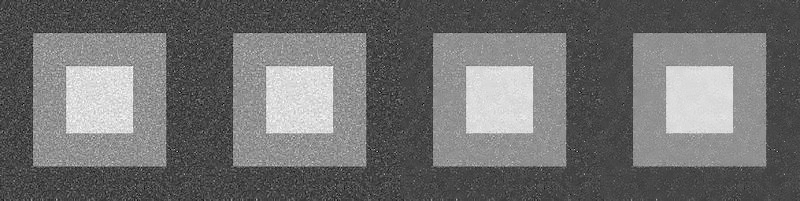

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper200x200.jpg')

bilateralFiltered = np.hstack([
  image,                             
	cv2.bilateralFilter(image, 3, 21, 21),
	cv2.bilateralFilter(image, 9, 41, 41),
	cv2.bilateralFilter(image, 11, 61, 61)])

cv2_imshow(bilateralFiltered)

blurred images


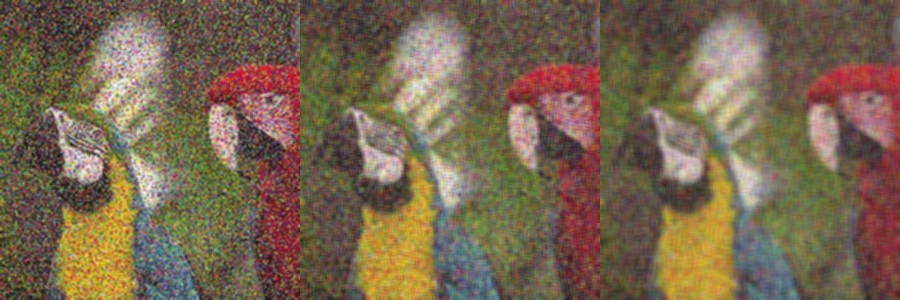

gaussian blurred images


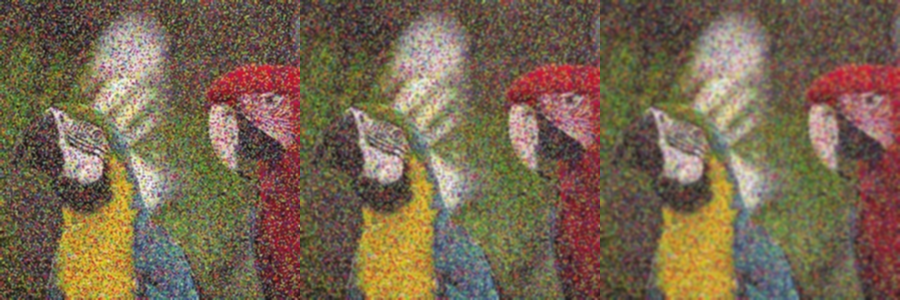

median blurred images


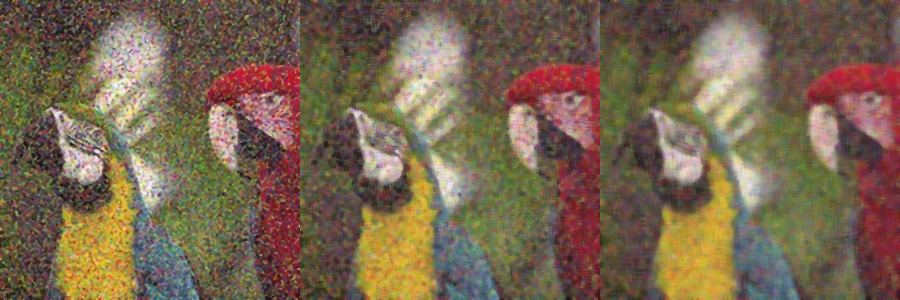

bilateral filtered images


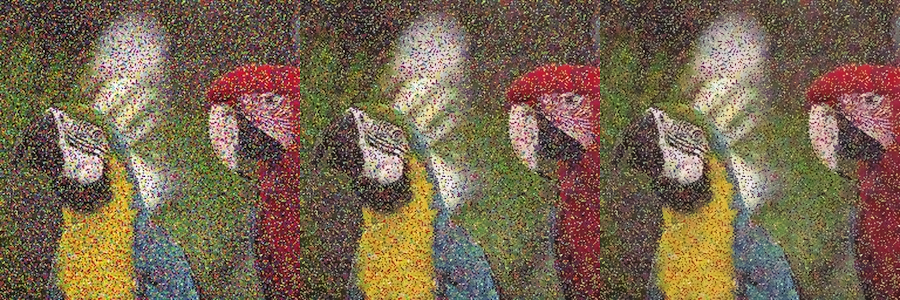

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper200x200.jpg')
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper150x150.jpg')
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper300x200.jpg')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/photos/saltnpepper300x300.jpg')

print("blurred images")
blurred = np.hstack([
	cv2.blur(image, (3, 3)),
	cv2.blur(image, (5, 5)),
	cv2.blur(image, (7, 7))])
cv2_imshow(blurred)

print("gaussian blurred images")
GaussianBlurred = np.hstack([
	cv2.GaussianBlur(image, (3, 3), 0),
	cv2.GaussianBlur(image, (5, 5), 0),
	cv2.GaussianBlur(image, (7, 7), 0)])
cv2_imshow(GaussianBlurred)

print("median blurred images")
medianBlurred = np.hstack([
	cv2.medianBlur(image, 3),
	cv2.medianBlur(image, 5),
	cv2.medianBlur(image, 7)])
cv2_imshow(medianBlurred)

print("bilateral filtered images")
bilateralFiltered = np.hstack([
	cv2.bilateralFilter(image, 3, 21, 21),
	cv2.bilateralFilter(image, 9, 41, 41),
	cv2.bilateralFilter(image, 11, 61, 61)])
cv2_imshow(bilateralFiltered)